# Improving Code Efficiency

Rob Morgan

rmorgan10.github.io

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import time

In [2]:
#Uncomment and run if you don't yet have these tools 
#! pip install line_profiler
#! pip install py-heat-magic
#! pip install memory_profiler

In [3]:
%load_ext line_profiler
%load_ext heat
%load_ext memory_profiler

### Outline

- Example: What do we mean by efficient?
- Algorithm Design
- Profiling Code
- Writing Efficient Code
- Fun Python Quirks

## Sources

All python implementations of list-sorting algorithms are from [The Algorithms](https://github.com/TheAlgorithms/Python)

Copyright (c) 2019 The Algorithms

All list-sorting gifs are from [Toptal](https://www.toptal.com/developers/sorting-algorithms)

The `numba` example is taken from Evan Schneider's talk in the [LSSTC Data Science Fellowship Program](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session8/Day4/numba_intro_solutions.ipynb)

# Example

### Sorting a list of numbers

Believe it or not, there are dozens of different ways to sort a list of numbers. We'll look at three and compare their efficiencies.

### Our Sorting Algorithms

- Insertion Sort (the simple one)
- Bubble Sort (the cute one)
- Merge Sort (the smart one)

In [4]:
def insertion_sort(collection):
    """Pure implementation of the insertion sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> insertion_sort([0, 5, 3, 2, 2])
    [0, 2, 2, 3, 5]
    >>> insertion_sort([])
    []
    >>> insertion_sort([-2, -5, -45])
    [-45, -5, -2]
    """
    
    collection_ = collection.copy()

    for loop_index in range(1, len(collection_)):
        insertion_index = loop_index
        while (
            insertion_index > 0
            and collection_[insertion_index - 1] > collection_[insertion_index]
        ):
            collection_[insertion_index], collection_[insertion_index - 1] = (
                collection_[insertion_index - 1],
                collection_[insertion_index],
            )
            insertion_index -= 1

    return collection_

### Insertion Sort

The simple one.

1. Start by iterating through an unsorted list
1. For each element, 
    1. traverse the list backwards until you find a smaller number
    1. Put the element right after the found smaller number
1. Once you finish the iteration, the list will be sorted

![Insertionsort](https://bs-uploads.toptal.io/blackfish-uploads/sorting_algorithms_page/content/illustration/animated_image_file/animated_image/27771/insertion-sort-e8e40865ca8316a75a00ae32347acffb.gif "insertion")

In [5]:
def bubble_sort(collection):
    """Pure implementation of bubble sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> bubble_sort([0, 5, 2, 3, 2])
    [0, 2, 2, 3, 5]
    >>> bubble_sort([])
    []
    >>> bubble_sort([-2, -45, -5])
    [-45, -5, -2]
    >>> bubble_sort([-23, 0, 6, -4, 34])
    [-23, -4, 0, 6, 34]
    >>> bubble_sort([-23, 0, 6, -4, 34]) == sorted([-23, 0, 6, -4, 34])
    True
    """
    collection_ = collection.copy()
    
    length = len(collection_)
    for i in range(length - 1):
        swapped = False
        for j in range(length - 1 - i):
            if collection_[j] > collection_[j + 1]:
                swapped = True
                collection_[j], collection_[j + 1] = collection_[j + 1], collection_[j]
        if not swapped:
            break  # Stop iteration if the collection is sorted.
            
    return collection
    

### Bubble Sort

The cute one.

1. Iterate through the unsorted list backwards and track the smallest element
1. Place this as the first element
1. Repeat step 1
1. Place the result as the second element
1. ...

![bubblesort](https://bs-uploads.toptal.io/blackfish-uploads/sorting_algorithms_page/content/illustration/animated_image_file/animated_image/27835/bubble-sort-295a6abfc3ca865791b985101ed9358f.gif "bubble")

In [6]:
def merge_sort(collection):
    """Pure implementation of the merge sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> merge_sort([0, 5, 3, 2, 2])
    [0, 2, 2, 3, 5]
    >>> merge_sort([])
    []
    >>> merge_sort([-2, -5, -45])
    [-45, -5, -2]
    """
    
    def merge(left, right):
        """merge left and right
        :param left: left collection
        :param right: right collection
        :return: merge result
        """
        result = []
        while left and right:
            result.append((left if left[0] <= right[0] else right).pop(0))
        return result + left + right

    if len(collection) <= 1:
        return collection
    mid = len(collection) // 2
    return merge(merge_sort(collection[:mid]), merge_sort(collection[mid:]))

### Merge Sort

The smart one.

1. Split an unsorted list in half
1. For each half, split in half again and repeat this process
1. Then, to merge two adjacent halves, iterate through them simultaneously and place the elements in order

![mergesort](https://bs-uploads.toptal.io/blackfish-uploads/sorting_algorithms_page/content/illustration/animated_image_file/animated_image/27899/merge-sort-eefc491a721d7d3b47f26bdf687907af.gif "mergesort")

## Sorting Algorithms, Start Your Engines!

In [7]:
data = list(np.random.uniform(1, 10000, size=50000).astype(int))

In [8]:
%%timeit
sorted_data = merge_sort(data)

396 ms ± 42.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
del data
data = list(np.random.uniform(1, 10000, size=50000).astype(int))

In [10]:
%%timeit -r 1
sorted_data = bubble_sort(data)

3min 51s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
del data
data = list(np.random.uniform(1, 10000, size=50000).astype(int))

In [12]:
%%timeit -r 1
sorted_data = insertion_sort(data)

3min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


If you're looking at this notebook not as a fancy slideshow, you're probably like "Hey Rob, why do you have these cells?"

```python
del data
data = list(np.random.uniform(1, 10000, size=50000).astype(int))
```
"... seems kinda whack, my guy."

So here's what's up. The functions that do the actual sorting interchange elements in the lists, but the list is still at the same place in memory after each function is applied. This means that the list will be already sorted when the next sorting function sees it, and in that case the functions finish much faster than expected because they have no work to do.

There are also some `.copy()` statements withing the functions and dummy variables like `collection_`. Probably one of these methods would suffice, but I was really frustrated trying to diagnose the issue so we're just going with all of them.

## Why so different?

The three algorithms do the same thing to the same data, so what makes one faster than the other?

To answer this, let's look at the runtime _as a function of the dataset size_. 

In [13]:
runtimes = {'MERGE': [], 'BUBBLE': [], 'INSERTION': [], 'SIZE': []}

for dataset_size in [10, 100, 1000, 10000]:
    runtimes['SIZE'].append(dataset_size)
    data = list(np.random.uniform(1, 10000, size=dataset_size).astype(int))
    
    # Run and time insertion-sort
    start = time.time()
    sorted_data = insertion_sort(data.copy())
    end = time.time()
    runtimes['INSERTION'].append(end - start)
    
    # Run and time bubble-sort
    start = time.time()
    sorted_data = bubble_sort(data.copy())
    end = time.time()
    runtimes['BUBBLE'].append(end - start)
    
    # Run and time merge-sort
    start = time.time()
    sorted_data = merge_sort(data.copy())
    end = time.time()
    runtimes['MERGE'].append(end - start)

In [14]:
def plot_runtimes(runtimes, annotate=False):
    
    plt.figure(figsize=(6,5))
    
    plt.plot(runtimes['SIZE'], runtimes['INSERTION'], label='Insertion Sort', lw=3, c='#8da0cb')
    plt.plot(runtimes['SIZE'], runtimes['BUBBLE'], label='Bubble Sort', lw=3, c='#fc8d62')
    plt.plot(runtimes['SIZE'], runtimes['MERGE'], label='Merge Sort', lw=3, c='#66c2a5')
    
    if annotate:
        plt.plot(runtimes['SIZE'],
                 np.array(runtimes['SIZE']) ** 2 * runtimes['MERGE'][0] / 400,
                 ls='--', lw=2, c='black')
        plt.text(2000, 10, r'$O(n^2)$', fontsize=14)
        plt.plot(runtimes['SIZE'],
                 np.array(runtimes['SIZE']) * np.log10(np.array(runtimes['SIZE'])) * runtimes['MERGE'][0] / 100,
                 ls='--', lw=2, c='black')
        plt.text(2000, 2.e-3, r'$O(n\log n)$', fontsize=14)
        plt.plot(runtimes['SIZE'],
                 np.array(runtimes['SIZE']) * runtimes['MERGE'][0] / 400,
                 ls='--', lw=2, c='black')
        plt.text(2000, 1.e-4, r'$O(n)$', fontsize=14)
    
    plt.xlabel("Dataset Size", fontsize=16)
    plt.ylabel("Runtime [sec]", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1.e-6, 100)
    
    plt.legend(loc='upper left', frameon=False, fontsize=14)
    
    plt.show()

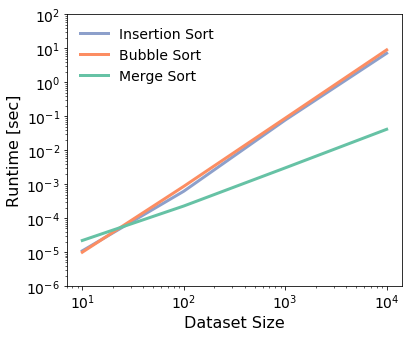

In [15]:
plot_runtimes(runtimes)

## Computer Science Time

In computer science lingo, people use "Big O" notation to characterize the asymptotic behavior of an algorithm's efficiency.

As an example, let's revisit the bubble sort algorithm:

1. Iterate through the unsorted list backwards and track the smallest element
1. Place this as the first element
1. Repeat step 1
1. Place the result as the second element
1. ...

This is $\mathcal{O}(n^2)$ asymptotic behavior.

- It has to consider each of the $n$ elements, and for each element it has to compare to at most $n-1$ other elements.
- $n$ $\times$ $(n-1)$ = $n^2 - n$ $\sim{n^2}$ for large $n$

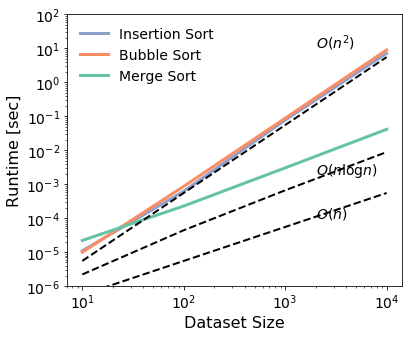

In [16]:
plot_runtimes(runtimes, annotate=True)

Can you think of a way to sort a list that might be $\mathcal{O}(n)$?

![](https://i.redd.it/nklehjyn07c41.jpg)

What about a sorting algorithm that's as slow as possible?

![](https://pics.me.me/from-random-import-shuffle-def-sort-1ist-while-not-is-sorted-list-62967667.png)

## Summary

In your research, the number of times you will have to design an algorithm to sort a list will hopefully be zero. So why spend time talking about it?

The most common reason code runs slowly:
- **Algorithmically** the code is inefficient

In the remainder of this talk, I'll show lots of little tricks for speeding up `python` code, but overall the biggest factor in the efficiency of the code is the algorithmic design. 

# Profiling Code

Let's take a look at how you can spot parts of your code that could use some TLC.

Let's say you have a function that for an input list returns the sum of the smallest n elements as the nth element in a new list.

In [17]:
def get_n_smallest(list_, n):
    return sorted(list_)[0:n]

In [18]:
def get_sum(list_):
    sum_ = 0
    for element in list_:
        sum_ += element
    return sum_

In [19]:
def function(list_, return_output=False):
    output_list = []
    
    for n in range(len(list_)):
        smallest_n = get_n_smallest(list_, n)
        sum_smallest_n = get_sum(smallest_n)
        output_list.append(sum_smallest_n)

    if return_output:
        return output_list

### Profiling Practice

Let's generate some dummy data to run this function on

In [20]:
list_1 = list(np.random.uniform(1, 1000, size=500))

and try to spot the bottlenecks in this code when running on the list.

## Tools for spotting algorithmic inefficiencies

Profilers are your best friends.

- `%time`
- `%timeit`
- `%prun`
- `%lprun`
- `%%heat`
- `%memit`
- `%mprun`

There are certainly more, but these are dippity dope.

### Runtime profilers

In [21]:
%timeit function(list_1)

62.7 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%time function(list_1)

CPU times: user 68.2 ms, sys: 1.65 ms, total: 69.8 ms
Wall time: 70.4 ms


### Functional profilers

In [23]:
%prun function(list_1)

![](prun_output.png)

### Memory Profilers

In [24]:
%memit function(list_1)

peak memory: 89.77 MiB, increment: 0.03 MiB


Next up is `%mprun`

`%mprun` works on a file, not a cell, so we have to make a dummy script real quick.

In [25]:
%%file mprun_demo.py

import numpy as np

list_1 = list(np.random.uniform(1, 1000, size=500))

def get_n_smallest(list_, n):
    return sorted(list_)[0:n]

def get_sum(list_):
    sum = 0
    for element in list_:
        sum += element
    return sum

def function(list_):
    output_list = []

    for n, element in enumerate(list_):
        smallest_n = get_n_smallest(list_, n)
        sum_smallest_n = get_sum(smallest_n)
        output_list.append(sum_smallest_n)

Overwriting mprun_demo.py


In [26]:
from mprun_demo import function as demo_function
%mprun -f demo_function demo_function(list_1)

![](mprun_output.png)

### Line Profilers

In [27]:
%lprun -f function function(list_1)

![](lprun_output.png)

### Fancy Line Profilers

```python
%%heat 
import numpy as np

list_1 = list(np.random.uniform(1, 1000, size=500))

def get_n_smallest(list_, n):
    return sorted(list_)[0:n]

def get_sum(list_):
    sum = 0
    for element in list_:
        sum += element
    return sum

def function(list_):
    output_list = []

    for n, element in enumerate(list_):
        smallest_n = get_n_smallest(list_, n)
        sum_smallest_n = get_sum(smallest_n)
        output_list.append(sum_smallest_n)
    
function(list_1)
```

![](heatdemo.png)

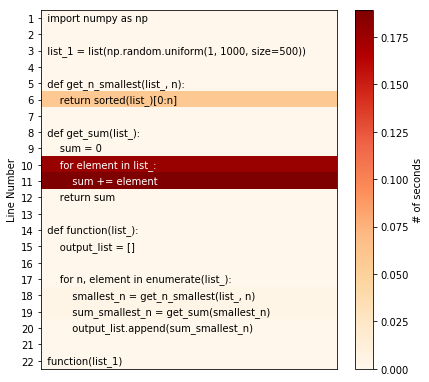

In [28]:
%%heat 
import numpy as np

list_1 = list(np.random.uniform(1, 1000, size=500))

def get_n_smallest(list_, n):
    return sorted(list_)[0:n]

def get_sum(list_):
    sum = 0
    for element in list_:
        sum += element
    return sum

def function(list_):
    output_list = []

    for n, element in enumerate(list_):
        smallest_n = get_n_smallest(list_, n)
        sum_smallest_n = get_sum(smallest_n)
        output_list.append(sum_smallest_n)
    
function(list_1)

## Profiling Summary

If your code feels slow, **profiling should be your first step.**

Built-in profilers like `%time`, `%timeit`, `%prun`, `%lprun`, `%%heat`, `%memit`, and `%mprun` can diagnose where your code is spending the most time and energy. 

Re-designing the code to make these areas more algorithmically efficient is the best way to improve your code.

# How to Actually Write Algorithmically Efficient Code in Python

So far we've defined algorithmic efficiency and looked at tools for diagnosing inefficiency.

Let's take a look at how one might use these tools to make their code more efficient.

### We'll cover three main techniques

1. Vectorization
1. Parallelization
1. Compilation

## Vectorization

When you are trying to perform an operation on every element in an array, there are ways to speed up this repeditive calculation.

Enter `numpy`.

### Example

Let's say we want to add 6 to every element in a list of 1,000,000 elements.

In [29]:
data = np.random.uniform(1, 10000, size=1000000)

In [30]:
%%timeit
data_plus_6 = []
for x in data:
    data_plus_6.append(x + 6)

294 ms ± 4.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%timeit [x + 6 for x in data]

271 ms ± 4.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%timeit data + 6

541 µs ± 39.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Numpy

A very common `python` package for numerical computations.

The underlying data structure of `numpy` is an `array` which can have arbitrarily many dimensions. A `numpy.array` will apply operations to all of it's elements simultaneosly. 

Thus, if you can replace a `for` loop in your code with an array, you are going from $\mathcal{O}(n)$ to $\mathcal{O}(1)$.

Often, scientific codes can be much improved with this simple change.

### Most Common Numpy Functions

`numpy.where()`
- Apply a logical condition to every element in an array simultaneously

`numpy.linspace()`, `numpy.logspace()`, and `numpy.arange()`
- Create an array of numbers by specifying a minimum and maximum

`np.random`
- A library of probability distributions that you can sample from at $\mathcal{O}(1)$

The `axis` argument in `numpy` functions
- Allows you to specify which dimension of the array you operate on

Let's do an example with a calculation along different axes, because it really is that important.

In [33]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(arr)

print("\nSum along all rows")
print(np.sum(arr, axis=1))

print("\nGet the 90th percentile cutoff across all columns")
print(np.percentile(arr, q=90, axis=0))

print("\nFor all rows and all columns, find the median")
print(np.median(arr))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Sum along all rows
[10 26 42]

Get the 90th percentile cutoff across all columns
[ 8.2  9.2 10.2 11.2]

For all rows and all columns, find the median
6.5


**Bonus `numpy` tip** (not related to code efficiency)
- `numpy.save()` and `numpy.load()` will legitimately improve your overall quality of life.

## Parallelization

Is something you're doing $\mathcal{O}(n)$? 

No problem! Just run it on $n$ computers!

There are a couple different types of parallelization:

1. Distributed computing
1. Local multi-processing
1. Local threading


### Distributed Computing

Sometimes you are fortunate enough to have access to a computing cluster.

If this is your case, a strategy for running one code or job on a lot of data is to split up your data and run the code on small chunks of it in parallel, each on a separate computer in the cluster. Then when all is said and done, you aggregate the results and go on with your day.

At UW-Madison, you can obtain access to the High-Performance Computing Cluster run from the Institute for Discovery, request an account on the HEP computing cluster, or gain access to a remote cluster your group may work with.

### Local Multi-Processing

Multi-processing is a way of doing this "split-up, run-in-parallel, aggregate" dance on your own computer.

Modern laptops are built with multiple "cores" where computations are performed. Each core can only do one thing at a time, in a serialized fashion, and this is how most day-to-day operations on your laptop are executed. 

BUT.

With neat modules you can distribute tasks to different cores on your computer and make things happen in parallel.

Let's look at a simple `python` example.

In [34]:
%%file multiprocess_demo.py

# Define the script you want to run with mulit-processing 
def worker(num):
    """process worker function"""
    print('Worker:', num)
    return

Overwriting multiprocess_demo.py


In [35]:
import multiprocessing
from multiprocess_demo import worker

# Trigger the parallelized jobs to start
jobs = []
for i in range(5):
    p = multiprocessing.Process(target=worker, args=(i,))
    jobs.append(p)
    p.start()

Worker: 1
Worker: 0
Worker: 2
Worker: 3
Worker: 4


### Local Threading

Similar but _ever so slightly_ different from multi-processing is threading.

You may have noticed that we created a standalone script to utilize the multi-processing library. But what if we have a small section within a larger script that we would like to parallelize?

This smaller task is exactly what threading is meant to make possible.

Let's look at an almost identical example.

In [36]:
import threading

# Define the script you want to run with threading
def worker(num):
    """thread worker function"""
    print('Worker:', num)
    return

# Trigger the parallelized jobs to start
jobs = []
for i in range(5):
    p = threading.Thread(target=worker, args=(i,))
    jobs.append(p)
    p.start()

Worker: 0
Worker:Worker: 1
 2
Worker: 3
Worker: 4


### Paralellization Summary

There are a lot of minute differences between distributed computing, multi-processing, and threading, but all tasks work towards the same goal:

- Run independent parts of a workflow in parallel instead of waiting on other parts to finish

Overall, these types of approaches can take your from $\mathcal{O}(n)$ to $\mathcal{O}(1)$ and often times make it possible for you to do calculations you need in an amount of time less than the length of the average PhD.

## Compilation

You may have noticed by now that everything I've shown has been geared around speeding up `python` code.

Why not talk about  `C++`, `Java`, `C`, `C#`, `Fortran`, or `Lisp`?

All these languages are "compiled" languages, and that aspect differentiates them from `python`.

When code is compiled, your computer knows ahead of time exactly what it needs to do, so it is easier for the computer to put its head down and grind away.

`Python` is an "interpreted" language, which means the computer is figuring out what it needs to do as it runs the program.

Let's think about a `for` loop through the eyes of your `python` interpreter.

```python
for i in [1, 2, "Cat", 4.578, ["a", "b"], 7]:
    """
    do stuff
    """
```

`Python` allows you to put any collection of objects together in a list. While this is sometimes convenient, it creates a need for the interpreter to figure out how to handle the current object in the iteration.

This attribute makes `python` super slow compared to compiled languages.

### Compiling Python Code

Thankfully, there are ways to compile your python code to speed things up if you're unable to design your way out of using a `for` loop.

We'll look at `numba` for doing this.

Other methods and modules exist for this purpose, such as `Cython`, but I'll leave those for another day.

### Just-In-Time Compiling with Python

`numba` is a super awesome module for compiling `python` code on the fly.

If you trigger `numba` on a `for` loop, the first time through the loop `numba` will compile the body of the loop. Then in subsequent iterations, the code will run at speeds comparable to compiled languages.

Let's try a simple example of computing the length of the hypotenuse of a right triangle from the other side lengths.

In [37]:
def hypotenuse(x, y):
    x = abs(x)
    y = abs(y)
    t = min(x, y)
    x = max(x, y)
    t = t / x
    return x * math.sqrt(1+t*t)

hypotenuse(3, 4)

5.0

Now let's `numba`-fy our `hypotenuse` function:

In [38]:
from numba import jit

numba_hypotenuse = jit(hypotenuse)

numba_hypotenuse(3, 4)

5.0

If you want to be a fancy pants, you can also `numba`-fy a function using decorators like this:

```python
@jit
def numba_hypotenuse(x, y):
    x = abs(x)
    y = abs(y)
    t = min(x, y)
    x = max(x, y)
    t = t / x
    return x * math.sqrt(1+t*t)
```

So which was faster?? Maybe some of the tools we've used earlier can help us figure it out.

In [39]:
%timeit hypotenuse(3, 4)

637 ns ± 21 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [40]:
%timeit numba_hypotenuse(3, 4)

149 ns ± 0.468 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Summary

The three main ways to speed up your code are vectorization, parallelizarion, and compilation. 

**You should also utilize these three things in that order.**

Vectorizing parts of your code is often just replacing a `for` loop with an array operation, and is a very easy change to make that will reduce the algorithmic complexity of your code.

Parallelization is great, but often requires redesigning large sections of your code and there can be a steep learning curve with submitting jobs on a cluster

Compiling works well in principle, but in practice `numba` can be finicky with the types of objects and the situations it work well with. It can also obfuscate the code.

**Before you do any of this:** Profile your code.

# Overall Summary

To assess the efficiency of your code, you should think in terms of algorithmic complexity. 
- Ask yourself, "How will the number of things my program has to do scale with the size of the data?"

Use profilers to diagnose parts of your code that might be bottlenecks.
- In this talk we looked at `%time`, `%timeit`, `%prun`, `%lprun`, `%%heat`, `%memit`, and `%mprun`

Employ techniques like vectorization, parallelization, and compilation to speed things up
- Vectorization: for reducing the algorithmic complexity
- Parallelization: for fighting through algorithmic complexity
- Compiliation: for saying "complexity comshmlexity, I'm just gonna run my code fast"

# Improving Code Efficiency

Rob Morgan

rmorgan10.github.io